In [1]:
from catalog import quick_start

# 一键启动，自动加载配置
manager = quick_start()
print(f"当前有 {len(manager.search())} 个实验")

当前有 22 个实验


In [2]:
from catalog import quick_start

manager = quick_start()

# 查询所有实验
all_experiments = manager.search()
print(f"总计 {len(all_experiments)} 个实验")

# 按芯片ID查询
chip_008_experiments = manager.search(chip_id="#20250804008")
print(f"芯片#20250804008有 {len(chip_008_experiments)} 个实验")

# 多条件查询
specific_experiments = manager.search(
    # chip_id="#20250804008", 
    device_id="4",
    status="completed"
)
print(f"符合条件的实验有 {len(specific_experiments)} 个")
# 获取第一个实验的详细信息
if specific_experiments:
    exp = specific_experiments[0]
    print(f"实验ID: {exp.test_id}")
    print(f"状态: {exp.status}")
    print(f"完成度: {exp.completion_percentage}%")
    print(f"有特征文件: {exp.has_features()}")

总计 22 个实验
芯片#20250804008有 6 个实验
符合条件的实验有 3 个
实验ID: test_20250825141031_4755d34f
状态: completed
完成度: 100.0%
有特征文件: True


In [ ]:
from catalog import UnifiedExperimentManager

# 初始化统一管理器 - 唯一需要了解的类
manager = UnifiedExperimentManager('catalog_config.yaml')

# ==================== 获取单个实验 ====================
# 方式1: 通过ID获取
exp = manager.get_experiment(42)

# 方式2: 通过条件获取
exp = manager.get_experiment(chip_id="#20250804008", device_id="3")

# 统一的属性访问
print(f"芯片: {exp.chip_id}")
print(f"设备: {exp.device_id}")
print(f"状态: {exp.status}")

# 获取步骤数 - 现在支持直接属性访问！
print(f"Transfer步骤: {exp.transfer_steps}")
print(f"Transient步骤: {exp.transient_steps}")

# 检查特征版本（推荐的版本列表）
available_versions = ['v1']  # 当前支持的版本
has_features = {v: exp.has_features(v) for v in available_versions}
print(f"特征版本状态: {has_features}")

# ==================== 数据访问 ====================
# 原始数据
transfer_data = exp.get_transfer_data(step_index=0)  # 单步数据
all_transfer = exp.get_transfer_data()  # 所有数据
transient_data = exp.get_transient_data(step_index=0)

# 特征数据
features = exp.get_features(['gm_max_forward', 'Von_forward'])
feature_matrix = exp.get_feature_matrix(version='v1')
features_df = exp.get_feature_dataframe(version='v1')

# 工作流信息 - 现在完全支持！
if exp.has_workflow():
    workflow = exp.get_workflow()
    exp.print_workflow()  # 打印工作流结构
    
    # 获取工作流摘要
    workflow_summary = exp.get_workflow_summary()
    print(f"工作流摘要: {workflow_summary}")
    
    # 导出工作流到文件
    if exp.export_workflow_json('workflow_export.json'):
        print("工作流导出成功!")
else:
    print("当前实验没有工作流信息")

# ==================== 可视化 ====================
# Transfer曲线绘图
fig = exp.plot_transfer_single(step_index=0, log_scale=False)  # 单步Transfer曲线
fig = exp.plot_transfer_multiple([0, 10, 20, 30])           # 多步对比
fig = exp.plot_transfer_evolution(max_steps=100)            # 演化图

# Transient曲线绘图
fig = exp.plot_transient_single(step_index=0, dual_time_axis=True)  # 单步（双时间轴）
fig = exp.plot_transient_all()                                      # 所有Transient整体图

# Transfer演化动画/视频
ani = exp.create_transfer_animation(max_steps=100, interval=200)     # 传统动画
video_path = exp.create_transfer_video('evolution.mp4', fps=15)     # 高性能视频

# 特征数据可视化
fig = exp.plot_feature_trend('gm_max_forward')         # 单个特征趋势

# 绘图器信息
plotter_info = exp.get_plotter_experiment_info()                    # 获取绘图器实验信息

2025-09-07 22:33:24 - experiment.repositories.batch_hdf5_repository - WARNING - batch_hdf5_repository.py:616 - 正在加载所有transfer数据，这可能会消耗大量内存


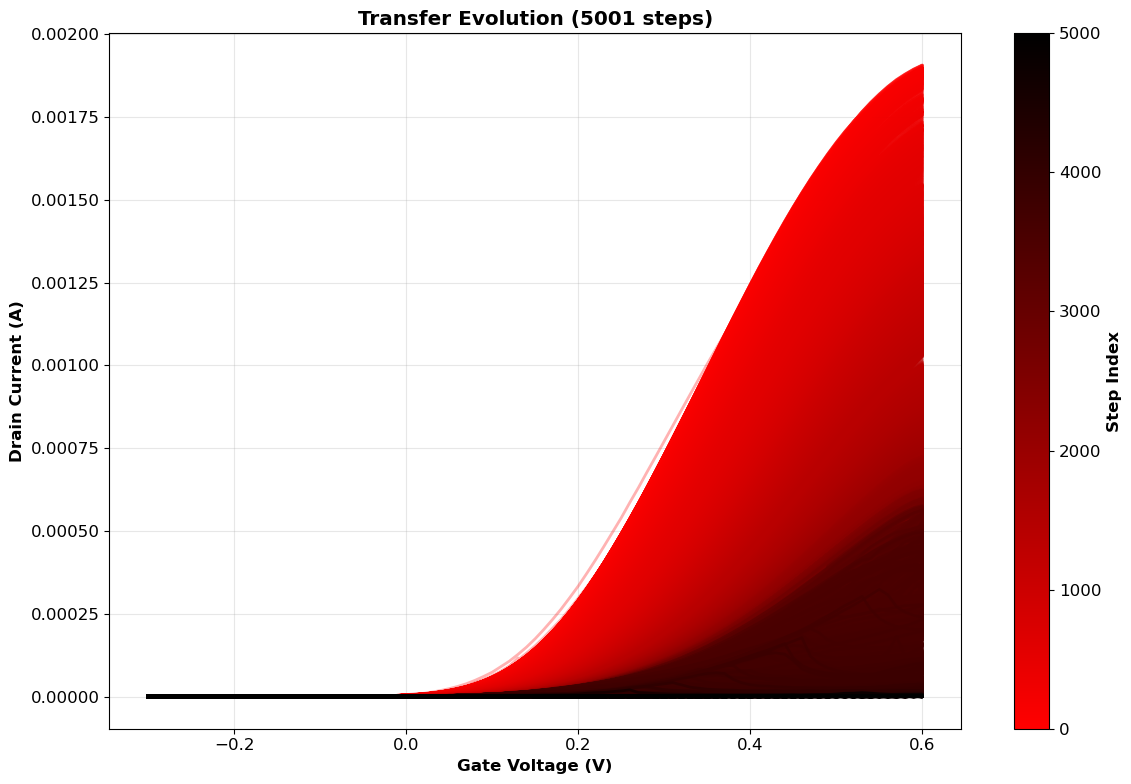

In [4]:
fig = exp.plot_transfer_evolution()            # 演化图


In [ ]:
# ==================== 搜索实验 ====================
# 基本搜索
experiments = manager.search(chip_id="#20250804008")
completed_exps = manager.search(status='completed')
missing_features = manager.search(missing_features=True)

# 高级搜索
experiments = manager.search(
    chip_id="#20250804008",
    status='completed',
    has_transfer_data=True,
    created_after='2025-08-01'
)

# ==================== 批量特征处理 ====================
# 批量提取特征
results = manager.batch_extract_features(
    experiments,
    version='v1',
    update_catalog=True
)
print(f"成功: {len(results['successful'])}, 失败: {len(results['failed'])}")

# ==================== 数据完整性管理 ====================
# 检查一致性
issues = manager.check_consistency()
print(f"缺少特征文件: {len(issues['missing_feature_files'])}")

# 自动修复
fixes = manager.auto_fix_inconsistencies(issues)
print(f"修复了 {fixes['fixed']} 个问题")

In [ ]:
from catalog import CatalogService

# 初始化服务
catalog = CatalogService('catalog_config.yaml')

# ==================== 扫描和索引 ====================
# 扫描指定路径并建立索引
result = catalog.scan_and_index([
    '/home/lidonghaowsl/develop_win/hdd/data/Stability_PS/raw',
    '/home/lidonghaowsl/develop_win/hdd/data/Stability_PS/features'
], incremental=True)

print(f"处理文件: {result.files_processed}")
print(f"新增: {result.files_added}")
print(f"更新: {result.files_updated}")

# ==================== 查询操作 ====================
# 基本查询
experiments = catalog.find_experiments(chip_id="#20250804008")
exp = catalog.get_experiment_by_id(42)
exp = catalog.get_experiment_by_test_id("unique_test_id")

# 复杂查询
from catalog.models import ExperimentFilter
from datetime import datetime

filter_obj = ExperimentFilter(
    chip_id="#20250804008",
    status='completed',
    has_transfer_data=True,
    created_after=datetime(2025, 8, 1),
    limit=50
)
experiments = catalog.find_experiments(**filter_obj.dict())

# ==================== 同步操作 ====================
# 文件到数据库同步
sync_result = catalog.sync_files_to_database()

# 数据库到文件同步
sync_result = catalog.sync_database_to_files()

# 双向同步
sync_result = catalog.bidirectional_sync()

print(f"同步完成: {sync_result.files_processed} 个文件")

# 完整pipeline

In [1]:
from catalog import UnifiedExperimentManager
import logging
from logger_config import log_manager, get_module_logger
# 配置日志
log_manager.set_levels(
    file_level=logging.WARNING,
    console_level=logging.WARNING
)
logger = get_module_logger()
manager = UnifiedExperimentManager('catalog_config.yaml')


In [2]:

pipeline_result = manager.process_data_pipeline(
    source_directory="/home/lidonghaowsl/develop_win/hdd/Source/20250915",  # 包含测试目录的根目录
    clean_json=True,                        # 先清理JSON文件
    num_workers=20,                         # 并行工作进程数
    conflict_strategy='skip',               # 跳过已存在的文件
    auto_extract_features=True,             # 自动提取特征
    show_progress=True                      # 显示进度条
)

print(f"处理结果: {pipeline_result['overall_success']}")
print(f"完成步骤: {pipeline_result['steps_completed']}")
if pipeline_result['overall_success']:
    conversion_stats = pipeline_result['results']['conversion']
    print(f"成功转换: {conversion_stats['successful_conversions']}/{conversion_stats['total_directories']}")

Folders: 100%|██████████| 16/16 [10:01<00:00, 37.62s/folder, OK: Test_Unit_E1_20250910170542_StabilityVg0p4_20250910-1705]  
2025-09-15 17:44:36 - experiment.repositories.batch_hdf5_repository - WARNING - batch_hdf5_repository.py:616 - 正在加载所有transfer数据，这可能会消耗大量内存
2025-09-15 17:44:45 - experiment.repositories.batch_hdf5_repository - WARNING - batch_hdf5_repository.py:616 - 正在加载所有transfer数据，这可能会消耗大量内存
2025-09-15 17:44:54 - experiment.repositories.batch_hdf5_repository - WARNING - batch_hdf5_repository.py:616 - 正在加载所有transfer数据，这可能会消耗大量内存
2025-09-15 17:45:03 - experiment.repositories.batch_hdf5_repository - WARNING - batch_hdf5_repository.py:616 - 正在加载所有transfer数据，这可能会消耗大量内存
2025-09-15 17:45:12 - experiment.repositories.batch_hdf5_repository - WARNING - batch_hdf5_repository.py:616 - 正在加载所有transfer数据，这可能会消耗大量内存
2025-09-15 17:45:21 - experiment.repositories.batch_hdf5_repository - WARNING - batch_hdf5_repository.py:616 - 正在加载所有transfer数据，这可能会消耗大量内存
2025-09-15 17:45:29 - experiment.reposito

处理结果: True
完成步骤: ['json_cleaning', 'discovery', 'conversion', 'feature_extraction']
成功转换: 16/16


In [ ]:
# # 步骤1: 清理JSON文件（整理test_info.json格式）
# clean_result = manager.clean_json_files(
#     source_directory="/home/lidonghaowsl/develop_win/hdd/Source/20250904",
#     pattern="test_info.json"                # 默认值
# )
# print(f"JSON清理结果: {clean_result['success']}")

# # 步骤2: 发现测试目录（查找包含test_info.json的目录）
# test_directories = manager.discover_test_directories(
#     source_directory="/home/lidonghaowsl/develop_win/hdd/Source/20250904",
#     exclude_output_dir=True                 # 排除输出目录，避免循环处理
# )
# print(f"发现 {len(test_directories)} 个测试目录")

# # 步骤3: 批量转换到HDF5格式
# conversion_result = manager.batch_convert_folders(
#     test_directories=test_directories,
#     num_workers=20,                         # 并行工作数
#     conflict_strategy='skip',               # 'overwrite', 'skip', 'rename'
#     show_progress=True
# )
# print(f"转换完成: {conversion_result['successful_conversions']}/{len(test_directories)}")


# # 步骤4: 转换后自动提取特征（可选）
# # if conversion_result['successful_conversions'] > 0:
# # 重新扫描以获取新转换的实验
# manager.catalog.scan_and_index()

# # 查找新实验并提取特征
# new_experiments = manager.search(missing_features=True)
# if new_experiments:
#     feature_results = manager.batch_extract_features(new_experiments, version='v1')
#     print(f"特征提取完成: {len(feature_results['successful'])} 个实验")

JSON清理结果: True
发现 10 个测试目录


Folders: 100%|██████████| 10/10 [00:00<00:00, 15.10folder/s, SKIP: Test_Unit_F1_20250830140622_Stability_6_Package_Si2025]


转换完成: 10/10


In [3]:

from catalog import UnifiedExperimentManager

manager = UnifiedExperimentManager('catalog_config.yaml')

# 强制全量扫描，重新处理所有文件关联
print("执行全量重新扫描...")
result = manager.catalog.scan_and_index(incremental=False)

print(f"全量扫描完成:")
print(f"  - 处理文件: {result.files_processed}")
print(f"  - 新增记录: {result.files_added}")
print(f"  - 更新记录: {result.files_updated}")

# 验证关联结果
experiments = manager.search()
feature_count = sum(1 for exp in experiments if exp.has_features())
print(f"  - 有特征的实验: {feature_count}/{len(experiments)}")

执行全量重新扫描...
全量扫描完成:
  - 处理文件: 132
  - 新增记录: 0
  - 更新记录: 66
  - 有特征的实验: 66/66


In [ ]:
from catalog import UnifiedExperimentManager
import logging
from logger_config import log_manager, get_module_logger

# 配置日志
log_manager.set_levels(
    file_level=logging.WARNING,
    console_level=logging.WARNING
)
logger = get_module_logger()

def complete_data_processing_workflow(source_dir: str):
    """完整的数据处理工作流"""

    manager = UnifiedExperimentManager('catalog_config.yaml')

    # 1. 创建新实验（从CSV/JSON到HDF5）
    print("创建新实验...")
    new_exp = manager.create_experiment(
        source_dir=source_dir,
        auto_extract_features=True,
        feature_versions=['v1']
    )

    # 2. 数据验证
    print("验证数据完整性...")
    if not new_exp.has_features('v1'):
        print("特征提取失败，重试...")
        manager.batch_extract_features([new_exp], version='v1')

    # 3. 生成可视化
    print("生成可视化...")
    # Transfer演化图
    fig = new_exp.plot_transfer_evolution()
    fig.savefig(f"outputs/{new_exp.chip_id}_{new_exp.device_id}_evolution.png")

    # Transfer演化视频（高性能并行版本）
    if new_exp.transfer_steps > 50:
        video_path = new_exp.create_transfer_video(
            save_path=f"outputs/{new_exp.chip_id}_{new_exp.device_id}_video.mp4",
            fps=15,
            verbose=True
        )

    # Transient图
    if new_exp.transient_steps > 0:
        fig = new_exp.plot_transient_single(step_index=0, dual_time_axis=True)
        fig.savefig(f"outputs/{new_exp.chip_id}_{new_exp.device_id}_transient.png")

    # 4. 特征分析
    if new_exp.has_features('v1'):
        features_df = new_exp.get_feature_dataframe('v1')

        # 特征趋势图
        key_features = ['gm_max_forward', 'Von_forward', 'absgm_max']
        available_features = [f for f in key_features if f in features_df.columns]

        if available_features:
            fig = new_exp.plot_feature_trend(available_features[0], version='v1')
            fig.savefig(f"outputs/{new_exp.chip_id}_{new_exp.device_id}_feature_trend.png")

    # 5. 数据导出
    print("导出数据...")
    # 注意：UnifiedExperiment没有直接的export方法
    # 可以通过获取数据然后手动导出
    exported_files = []
    
    # 导出特征数据
    if new_exp.has_features('v1'):
        features_df = new_exp.get_feature_dataframe('v1')
        if features_df is not None:
            export_path = f"exports/{new_exp.chip_id}_{new_exp.device_id}_features.csv"
            features_df.to_csv(export_path, index=False)
            exported_files.append(export_path)

    # 6. 生成报告
    report = {
        'experiment_id': new_exp.id,
        'chip_id': new_exp.chip_id,
        'device_id': new_exp.device_id,
        'status': new_exp.status,
        'transfer_steps': new_exp.transfer_steps,
        'transient_steps': new_exp.transient_steps,
        'has_features': new_exp.has_features('v1'),
        'exported_files': exported_files,
        'created_at': new_exp.created_at
    }

    print(f"实验处理完成: {new_exp.chip_id}-{new_exp.device_id}")
    return report